Welcome to JupyROOT 6.18/04


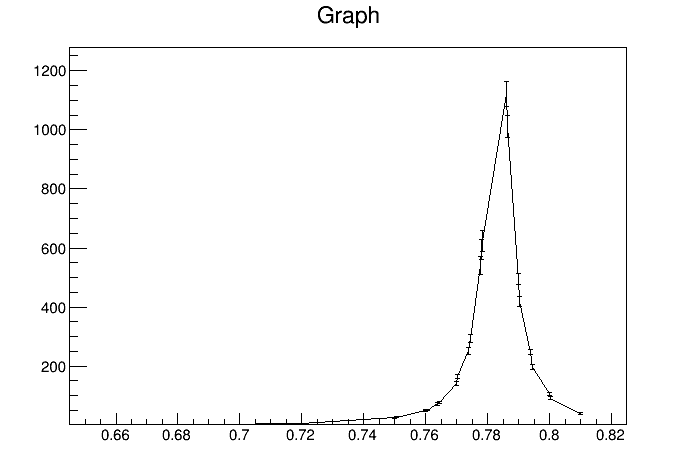

In [1]:
import math
import ROOT

#Создать и заполнить граф, нарисовать
canvas = ROOT.TCanvas()
gr = ROOT.TGraphErrors('~korol/Task6/variants/variant3.txt')
gr.Draw()
canvas.Draw()

In [2]:
#начальные параметры из графика
#высота пика A, положение M, ширина на полувысоте Γ

A0 = 1200
M0 = 0.78
G0 = 0.005

In [3]:
def func(xx, pp):
    A = pp[0]
    M = pp[1]
    G = pp[2]
    E = xx[0]
    return A * ((G/2)**2) / ((E-M)**2 + (G/2)**2)

func = ROOT.TF1( "func", func, 0.5, 1, 3)
func.SetParameter(0, A0)
func.SetParameter(1, M0)
func.SetParameter(2, G0)

In [4]:
fit_res = gr.Fit(func, "S")
#S for result for saving result in TFitResultPtr

 FCN=16.253 FROM MIGRAD    STATUS=CONVERGED     150 CALLS         151 TOTAL
                     EDM=2.65482e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.46533e+03   5.46089e+01   2.70248e-02  -4.45697e-06
   2  p1           7.83471e-01   6.49940e-05   3.73588e-07   4.02086e-01
   3  p2           8.96637e-03   2.03120e-04   1.00550e-07  -1.05393e+00


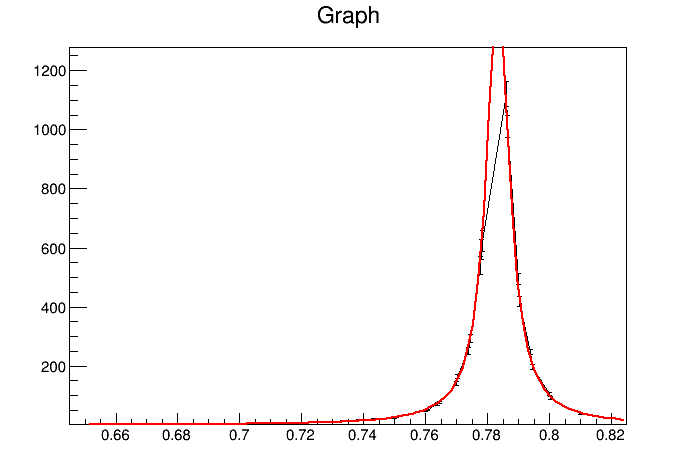

In [5]:
gr.Draw()
canvas.Draw()

In [6]:
#получить параметры их ошибки, xi^2/Ndf, вероятность

print("A = ", fit_res.Parameter(0), "\nA error = ", fit_res.ParError(0))
print("M =", fit_res.Parameter(1), "\nM error =", fit_res.ParError(1))
print("G =", fit_res.Parameter(2), "\nG error =", fit_res.ParError(2))
print(f'Chi2: {fit_res.Chi2()}; Ndf: {fit_res.Ndf()}')
print("Chi2/Ndf = ", fit_res.Chi2()/fit_res.Ndf())
print("P =", ROOT.TMath.Prob(fit_res.Chi2(), fit_res.Ndf())) 

mat = fit_res.GetCovarianceMatrix()
mat.Print()

A =  1465.3262045685246 
A error =  54.608876662994064
M = 0.7834714708129239 
M error = 6.499395481625456e-05
G = 0.008966372921374475 
G error = 0.00020312028684726574
Chi2: 16.25296872885767; Ndf: 22
Chi2/Ndf =  0.7387713058571669
P = 0.8031354620557843

3x3 matrix is as follows

     |      0    |      1    |      2    |
--------------------------------------------
   0 |       2982   -0.001394    -0.01076 
   1 |  -0.001394   4.224e-09   5.176e-09 
   2 |   -0.01076   5.176e-09   4.126e-08 



In [7]:
#по эффективности: создать гистограммы для A, M, Γ, в цикле (1-1000)

dE = 0.0001 #вклад в ошибку точности измерения шкалы энергии (общий для точек) 0.1 МэВ (нормальное распределение)
de = 0.01 # вклад в ошибку точности измерения эффективности (независимый в точках) δε/ε = 0.01*(E/1020)
E0 = 1.02

A_eff = ROOT.TH1F("A_eff", "A_eff", 100, 1425, 1505)
M_eff = ROOT.TH1F("M_eff", "M_eff", 100, 0.783, 0.784)
G_eff = ROOT.TH1F("G_eff", "G_eff", 100, 0.00876, 0.00916)

xs = gr.GetX()
ys = gr.GetY()

func.SetParameter(0, A0)
func.SetParameter(1, M0)
func.SetParameter(2, G0)

for j in range(1000): 
    ef_gr = ROOT.TGraphErrors(gr)
    for i in range(gr.GetN()):
        err = ys[i]*de*xs[i]/E0 # заполнить E’ -> E ; s’ -> RandomNorm(s, ошибка)
        s = ROOT.gRandom.Gaus(0, err)
        ef_gr.SetPoint(i, xs[i], s + ys[i])
        ef_gr.SetPointError(i, gr.GetErrorX(i), gr.GetErrorY(i))
    fit = ef_gr.Fit(func, "SQ") #  подогнать, скинуть значения в (3) гистограммы
    A_eff.Fill(fit.Parameter(0))
    M_eff.Fill(fit.Parameter(1))
    G_eff.Fill(fit.Parameter(2))

Warning in <TROOT::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warn

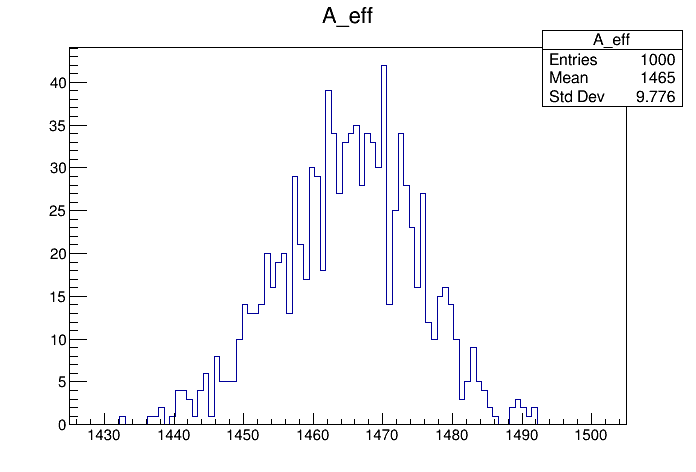

In [8]:
canvas.Clear()
A_eff.Draw()
canvas.Draw()

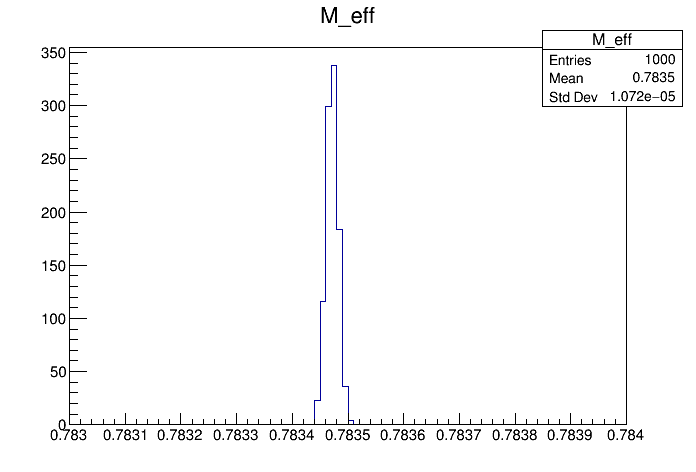

In [9]:
M_eff.Draw()
canvas.Draw()

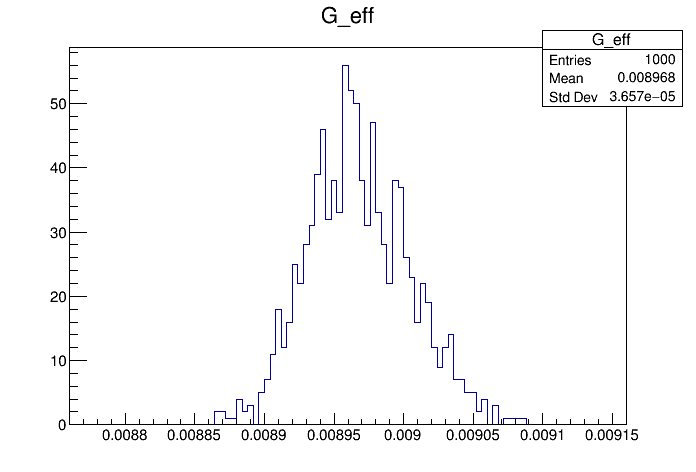

In [10]:
G_eff.Draw()
canvas.Draw()

In [11]:
# получить вклады в ошибки
print("A:", A_eff.GetRMS())
print("M:", M_eff.GetRMS())
print("G:", G_eff.GetRMS())

A: 9.775642217052742
M: 1.0724514887424047e-05
G: 3.656937036057614e-05


In [12]:
#по энергии: создать гистограммы, в цикле

A_energy = ROOT.TH1F("A_energy", "A_energy", 100, 1465.3, 1465.35)
M_energy = ROOT.TH1F("M_energy", "M_energy", 100, 0.783, 0.784)
G_energy = ROOT.TH1F("G_energy", "G_energy", 100, 0.0089662, 0.0089665)

func.SetParameter(0, A0)
func.SetParameter(1, M0)
func.SetParameter(2, G0)

for j in range(1000):
    en_gr = ROOT.TGraphErrors(gr) 
    sigma = ROOT.gRandom.Gaus(0, dE) # смещение dE = RandomNorm(0, ошибка)
    for i in range(gr.GetN()): # заполнить E’ -> E+dE; s’ -> s
        en_gr.SetPoint(i, xs[i] + sigma, ys[i])
        en_gr.SetPointError(i, gr.GetErrorX(i), gr.GetErrorY(i))
    fit = en_gr.Fit(func, "SQ") #  подогнать, скинуть значения в (3) гистограммы
    A_energy.Fill(fit.Parameter(0))
    M_energy.Fill(fit.Parameter(1))
    G_energy.Fill(fit.Parameter(2))

Warning in <TROOT::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warn

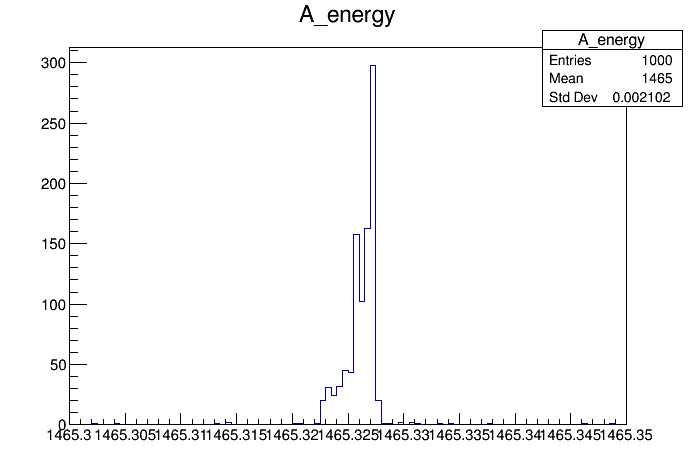

In [13]:
canvas.Clear()
A_energy.Draw()
canvas.Draw()

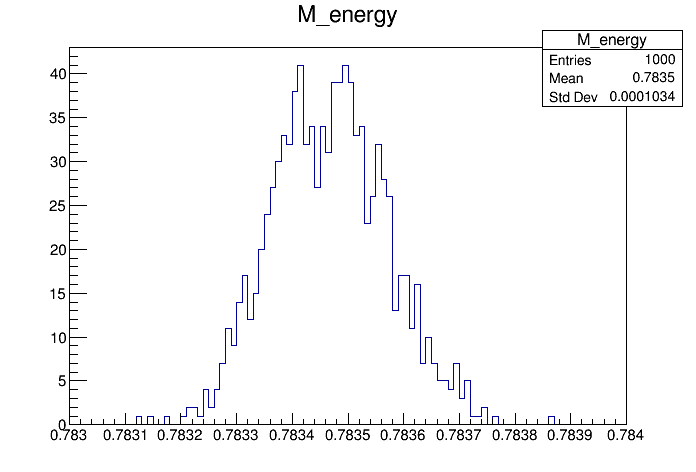

In [14]:
M_energy.Draw()
canvas.Draw()

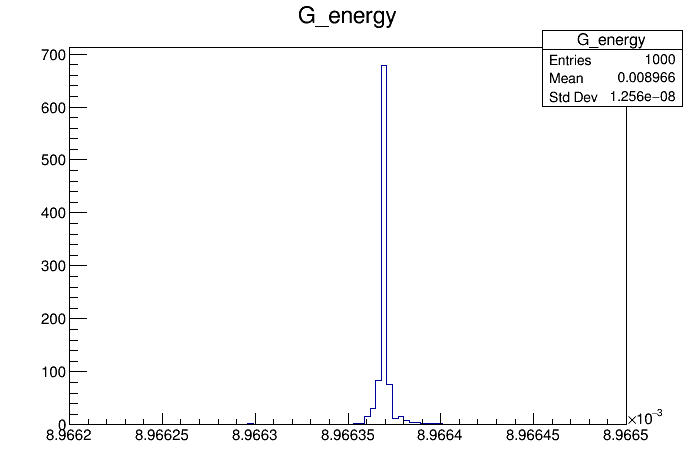

In [15]:
G_energy.Draw()
canvas.Draw()

In [16]:
# получить вклады в ошибки
print("A:", A_energy.GetRMS())
print("M:", M_energy.GetRMS())
print("G:", G_energy.GetRMS())

A: 0.00210172856748944
M: 0.00010337618637543769
G: 1.2562610347074418e-08


In [17]:
# Теоретический расчет ошибки через производную, ожидаемая 

from math import sqrt
from math import fabs

AF = fit_res.Parameter(0)
MF = fit_res.Parameter(1)
GF = fit_res.Parameter(2)

In [18]:
Asq = 0
for i in range(gr.GetN()):
    Ei0 = xs[i]
    si0 = (AF*(GF/2)**2)/((Ei0 - MF)**2 + (GF/2)**2)
    ds = 0.01*(Ei0/1.02)*si0
    dAi = ds*((Ei0 - MF)**2 + (GF/2)**2)/((GF/2)**2)
    Asq += dAi**2
Asq = sqrt(Asq/gr.GetN())
Asq

11.039049940299716

In [19]:
A_eff.GetRMS()

9.775642217052742

In [20]:
Gsq = 0
for i in range(gr.GetN()):
    Ei0 = xs[i]
    si0 = (AF*(GF/2)**2)/((Ei0 - MF)**2 + (GF/2)**2)
    ds = 0.01*(Ei0/1.02)*si0
    dGi = (1/((si0 + ds)**2))*sqrt(fabs((AF - si0 - ds)/(si0+ds)))*(Ei0 - MF)*ds
    Gsq += dGi**2
Gsq = sqrt(Gsq/gr.GetN())
Gsq

0.0023794253053991

In [21]:
G_eff.GetRMS()

3.656937036057614e-05

In [22]:
Msq = 0
for i in range(gr.GetN()):
    Ei0 = xs[i]
    s0 = A0/((Ei0-M0)**2/(G0/2)**2 + 1)
    ds = 0.01*Ei0/1.02 
    dMi = A0 * G0/4/s0/sqrt(A0/s0 - 1)*ds
    Msq += dMi**2   
Msq = sqrt(Msq / gr.GetN())
Msq

0.0001226694599705445

In [23]:
M_eff.GetRMS()

1.0724514887424047e-05

In [24]:
print("En")
print("A:", A_energy.GetRMS())
print("M:", M_energy.GetRMS())
print("G:", G_energy.GetRMS())
print("Eff")
print("A:", A_eff.GetRMS())
print("M:", M_eff.GetRMS())
print("G:", G_eff.GetRMS())
print("Expected")
print("A:",Asq)
print("M:",Msq)
print("G:",Gsq)

En
A: 0.00210172856748944
M: 0.00010337618637543769
G: 1.2562610347074418e-08
Eff
A: 9.775642217052742
M: 1.0724514887424047e-05
G: 3.656937036057614e-05
Expected
A: 11.039049940299716
M: 0.0001226694599705445
G: 0.0023794253053991


In [25]:
# оценка
dE = 0.0001 #вклад в ошибку точности измерения шкалы энергии (общий для точек) 0.1 МэВ (нормальное распределение)
de = 0.01 # вклад в ошибку точности измерения эффективности (независимый в точках) δε/ε = 0.01*(E/1020)
E0 = 1.02

AF = fit_res.Parameter(0)
MF = fit_res.Parameter(1)
GF = fit_res.Parameter(2)

print(AF)
print(MF)
print(GF)

1465.3262045685246
0.7834714708129239
0.008966372921374475


In [30]:
ds1 = de/E0 * AF/8*(MF-GF/2) #M-G/2
ds2 = de/E0 * AF/4*(MF) #M
ds3 = de/E0 * AF/8*(MF+GF/2) #M+G/2
print("ds1: ", ds1)
print("ds2: ", ds2)
print("ds3: ", ds3)

ds1:  1.3988626790603058
ds2:  2.813826658612798
ds3:  1.4149639795524918


In [41]:
# ожидаем
dA = 4*sqrt(ds2**2)
dG = 4*GF/AF*sqrt(abs(ds1**2 - ds2**2 + ds3**2))
dM = 2*GF/AF*sqrt(ds1**2 + ds3**2)

In [40]:
print("Eff")
print("A:", A_eff.GetRMS())
print("M:", M_eff.GetRMS())
print("G:", G_eff.GetRMS())
print("Expect")
print("A: ", dA)
print("M: ", dM)
print("G: ", dG)

Eff
A: 9.775642217052742
M: 1.0724514887424047e-05
G: 3.656937036057614e-05
Expect
A:  11.255306634451191
M:  2.4350166171205494e-05
G:  4.869873774136203e-05
